In [1]:
import torch
import torch.nn as nn
import os
import sys
import numpy as np
import math
#import scipy.special as bessel
#from scipy.io import loadmat

import DRLPDE_nn
#import DRLPDE_param_solver
#import DRLPDE_functions.DefineDomain
#import DRLPDE_functions.EvaluateWalkers

import matplotlib.pyplot as plt
#import cv2

import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 300
#plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.serif'] = ['Computer Modern']
#plt.rcParams['font.size'] = 12


In [2]:
## Load Trained model
nn_param = {'depth': 60,
                'width': 4,
                'x_dim':2,
                'is_unsteady':False,
                'output_dim':2
                }

loadmodel = 'continuation_cavityflow'

Velocity_NN = DRLPDE_nn.IncompressibleNN
model = Velocity_NN(**nn_param)
model.load_state_dict(torch.load("savedmodels/" + loadmodel + ".pt"))


imagefilename = 'Error_Plot_' + loadmodel
imagesfolder = "images/"

In [3]:
numplotpts1d = 128
numplotpts = numplotpts1d**2

L = 1.0

x1g, x2g = torch.meshgrid([torch.linspace(-L, L, numplotpts1d), 
                           torch.linspace(-L, L, numplotpts1d)])
xg = torch.stack((x1g.reshape(-1), x2g.reshape(-1)), dim=1).requires_grad_(True)

Trained_Vel = model(xg).reshape(numplotpts1d, numplotpts1d, 2).detach().numpy()

Trained_Vel_U = Trained_Vel[:,:,0]
Trained_Vel_V = Trained_Vel[:,:,1]

/home/mskpark/.local/lib/python3.10/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [4]:
np.max(Trained_Vel_U)

0.005579109

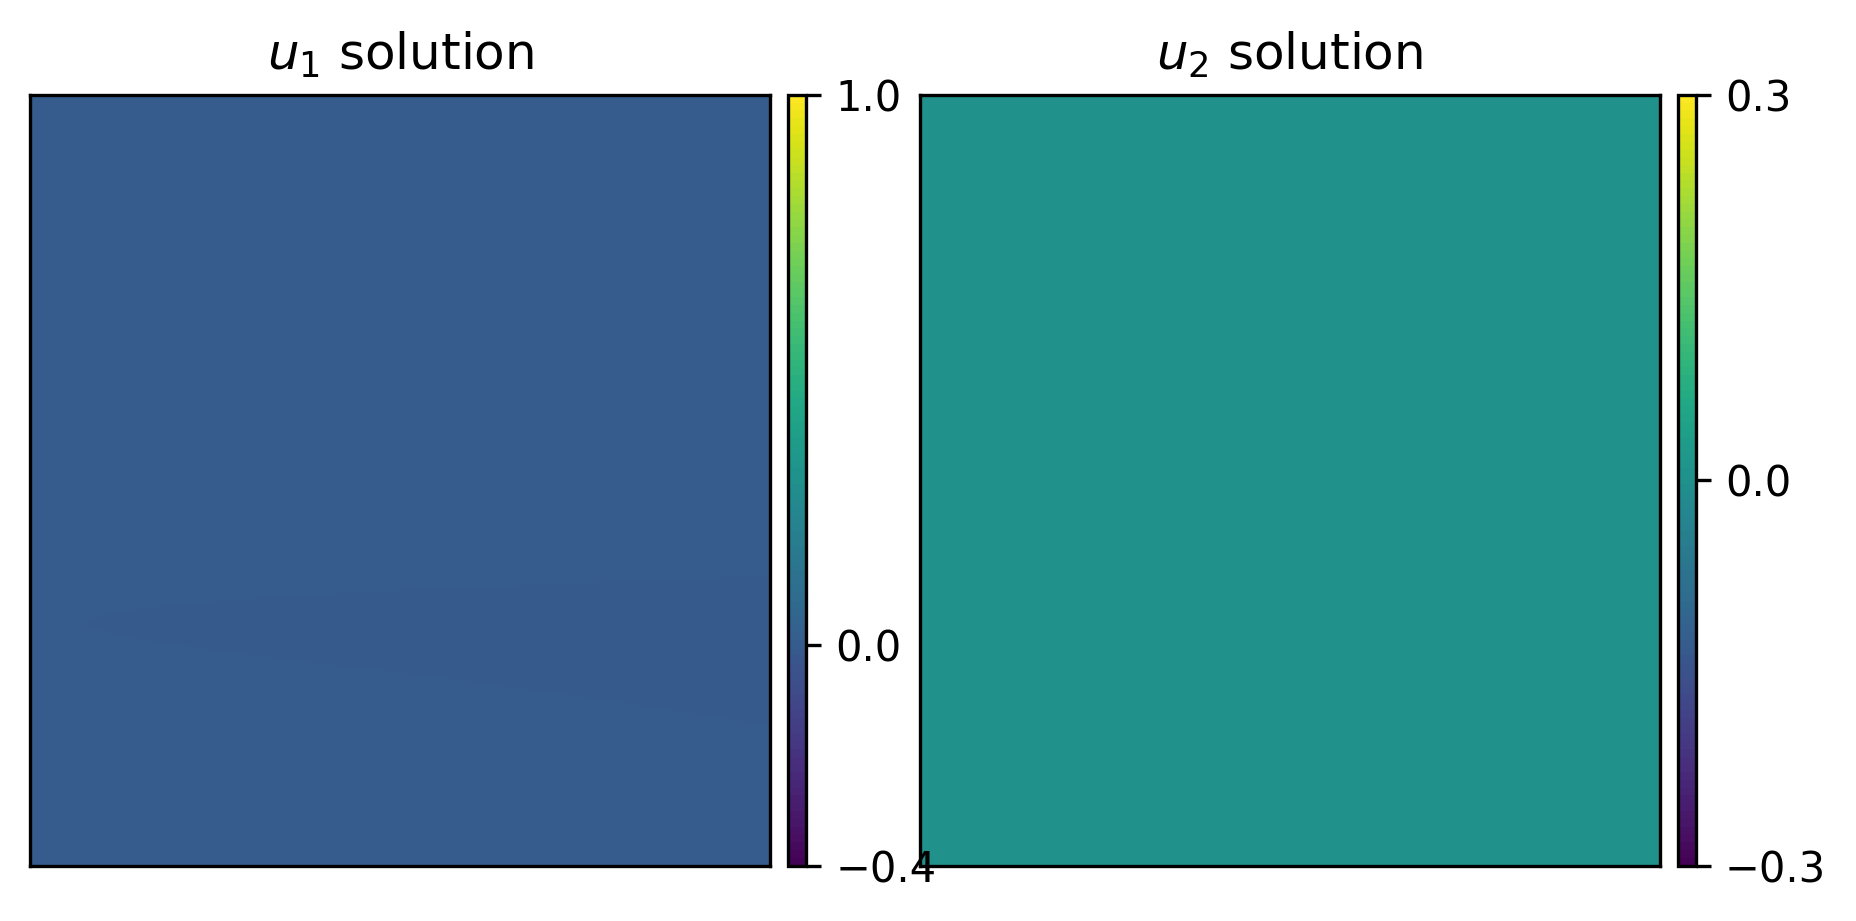

In [5]:
### Plotting

levels_cavity_flow_1 = np.linspace(-0.4, 1.0, 100)
ticks_cavity_flow_1  = [-0.4, 0.0, 1.0]

levels_cavity_flow_2 = np.linspace(-0.3, 0.3, 100)
ticks_cavity_flow_2  = np.linspace(-0.3, 0.3, 3)


plt.close('all')
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=[6, 3])
fig.tight_layout(pad=0.5)

## Plot 0

contour0 = ax[0].contourf(x1g.detach().cpu().numpy(), 
                            x2g.detach().cpu().numpy(), 
                            Trained_Vel_U, levels = levels_cavity_flow_1, 
                            cmap=plt.cm.viridis)
ax[0].set_title(r'$u_1$ solution')

ax[0].tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False
)

colorbar0_param = fig.add_axes(
    [ax[0].get_position().x1 + 0.01,
     ax[0].get_position().y0,
     0.01,
     ax[0].get_position().height])
colorbar0 = plt.colorbar(contour0, ticks=ticks_cavity_flow_1, cax = colorbar0_param)
colorbar0.ax.tick_params(labelsize=10)


## Plot 3

contour3 = ax[1].contourf(x1g.detach().cpu().numpy(), 
                            x2g.detach().cpu().numpy(), 
                            Trained_Vel_V, levels = levels_cavity_flow_2, 
                            cmap=plt.cm.viridis)
ax[1].set_title(r'$u_2$ solution')

ax[1].tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False
)

colorbar3_param = fig.add_axes(
    [ax[1].get_position().x1 + 0.01,
     ax[1].get_position().y0,
     0.01,
     ax[1].get_position().height])
colorbar3 = plt.colorbar(contour3, ticks=ticks_cavity_flow_2, cax = colorbar3_param)
colorbar3.ax.tick_params(labelsize=10)


